In [5]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('default')
sns.set_palette("husl")

In [ ]:
# Importing the dataset
House_data = pd.read_excel('HousingData.xlsx', sheet_name ='HousingData')

Business understanding

In [7]:

print("CRISP-DM Pipeline: Housing Data Analysis")
print("="*50)
print("Business Objective: Analyze housing characteristics and predict property values")
print("Dataset: Housing properties with 15 features including:")
print("- Crime rates, pollution, accessibility")
print("- Property characteristics (rooms, age)")
print("- Neighborhood factors (school ratios, employment distance)")
print("- Demographics and taxation")

CRISP-DM Pipeline: Housing Data Analysis
Business Objective: Analyze housing characteristics and predict property values
Dataset: Housing properties with 15 features including:
- Crime rates, pollution, accessibility
- Property characteristics (rooms, age)
- Neighborhood factors (school ratios, employment distance)
- Demographics and taxation


Data understanding

In [13]:

# Define column names with full descriptions
column_names = {
    'PID': 'Property ID',
    'CRIM': 'Per capita crime rate',
    'AC': 'Acreage Compound (proportion of compound/farmland)',
    'INDUS': 'Proportion of non-retail business acres per town',
    'LS': 'Lake-side residence (1 if bounds lake, 0 if far from lake)',
    'PR': 'Pollution Rate (parts per 10 million)',
    'RM': 'Average number of rooms per residence',
    'AGE': 'Age of property owner in years',
    'DIS': 'Weighted distances to major employment centres',
    'RAD': 'Index of accessibility to radial highways',
    'PTRATIO': 'Pupil/teacher ratio by town',
    'DMT': 'Distance to Major Tourism (km)',
    'LSTAT': '% lower status of the population',
    'MO': 'Number of minors per residence',
    'TAX': 'Property tax per year (dollars)'
}

# Load data from Excel file
House_data= pd.read_excel('HousingData.xlsx', sheet_name=0)

print("Dataset Shape:", House_data.shape)
print("\nColumn Information:")
for col in House_data.columns:
    print(f"{col}: {column_names.get(col, 'Unknown')}")
    
print("\nFirst 5 rows:")
House_data.head()

Dataset Shape: (506, 15)

Column Information:
PID: Property ID
CRIM: Per capita crime rate
AC: Acreage Compound (proportion of compound/farmland)
INDUS: Proportion of non-retail business acres per town
LS: Lake-side residence (1 if bounds lake, 0 if far from lake)
PR: Pollution Rate (parts per 10 million)
RM: Average number of rooms per residence
AGE: Age of property owner in years
DIS: Weighted distances to major employment centres
RAD: Index of accessibility to radial highways
PTRATIO: Pupil/teacher ratio by town
DMT: Distance to Major Tourism (km)
LSTAT: % lower status of the population
MO: Number of minors per residence
TAX: Property tax per year (dollars)

First 5 rows:


,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
0,101,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,2.0,296.0
1,102,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,2.0,242.0
2,103,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,292.40,4.03,3.0,242.0
3,104,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,0.0,222.0
4,105,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,0.0,222.0


# DATASET INFORMATION

In [10]:
House_data.info()
#Checking the data types for the columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PID      506 non-null    int64  
 1   CRIM     504 non-null    float64
 2   AC       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   LS       504 non-null    float64
 5   PR       503 non-null    float64
 6   RM       502 non-null    float64
 7   AGE      502 non-null    float64
 8   DIS      503 non-null    float64
 9   RAD      504 non-null    float64
 10  PTRATIO  503 non-null    float64
 11  DMT      502 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MO       504 non-null    float64
 14  TAX      505 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


All the columns have numerical data

# Statistical summary

In [14]:
House_data.describe()

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
count,506.000000,504.000000,506.000000,506.000000,504.000000,503.000000,502.000000,502.00000,503.000000,504.000000,503.000000,502.000000,505.000000,504.000000,505.000000
mean,353.500000,3.604056,11.363636,11.136779,0.069444,0.554164,6.285307,68.53008,3.796207,9.492063,18.443539,305.414530,12.654099,0.644841,407.726733
std,146.213884,8.609134,23.322453,6.860353,0.254461,0.115830,0.704098,28.13882,2.103234,8.676649,2.165602,142.836519,7.148104,1.794307,168.312294
min,101.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.90000,1.129600,1.000000,12.600000,0.320000,1.730000,0.000000,187.000000
25%,227.250000,0.082155,0.000000,5.190000,0.000000,0.449000,5.885500,45.02500,2.100350,4.000000,17.350000,293.572500,6.930000,0.000000,279.000000
50%,353.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.50000,3.215700,5.000000,19.000000,386.910000,11.340000,0.000000,330.000000
75%,479.750000,3.674808,12.500000,18.100000,0.000000,0.624000,6.623500,93.97500,5.164950,24.000000,20.200000,394.997500,16.960000,0.000000,666.000000
max,606.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,22.000000,396.900000,37.970000,19.000000,711.000000


The statistics reveals several important patterns. Variables such as CRIM, LSTAT, and TAX show heavy skewness with extreme outliers, indicating that while most towns have low crime, modest lower-status populations, and average tax rates, a few towns experience exceptionally high values. In terms of housing, most towns have around six rooms per dwelling, but wealthier areas feature larger homes with up to nine rooms. The combination of LSTAT and RM reflects socio-economic inequality, where some neighborhoods are low-status with smaller homes, while others are more affluent with larger houses. Accessibility also varies significantly, as shown by DIS and RAD, with some towns located far from employment centers and others being highly connected to highways. Additionally, differences in school quality (PTRATIO) and property tax levels (TAX) suggest strong links to housing values across neighborhoods.

In [15]:

print("Missing Values Analysis:")
print("="*25)
missing_values = House_data.isnull().sum()
missing_percent = (House_data.isnull().sum() / len(House_data)) * 100

missing_House_data = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
   
})

print(missing_House_data[missing_House_data['Missing Count'] > 0])



Missing Values Analysis:
     Column  Missing Count
1      CRIM              2
4        LS              2
5        PR              3
6        RM              4
7       AGE              4
8       DIS              3
9       RAD              2
10  PTRATIO              3
11      DMT              4
12    LSTAT              1
13       MO              2
14      TAX              1


CRIM, LS, RAD, MO, and TAX have 1 to 2 missing entries each 
 PR, DIS, and PTRATIO have 3 missing entries each
  RM, AGE, and DMT have the most missing values with 4 each an while LSTAT has only 1 missing value.
  This means the number of missing values are relatively small hence can be handeled using imputation methods

# Exploratory Data Analysis

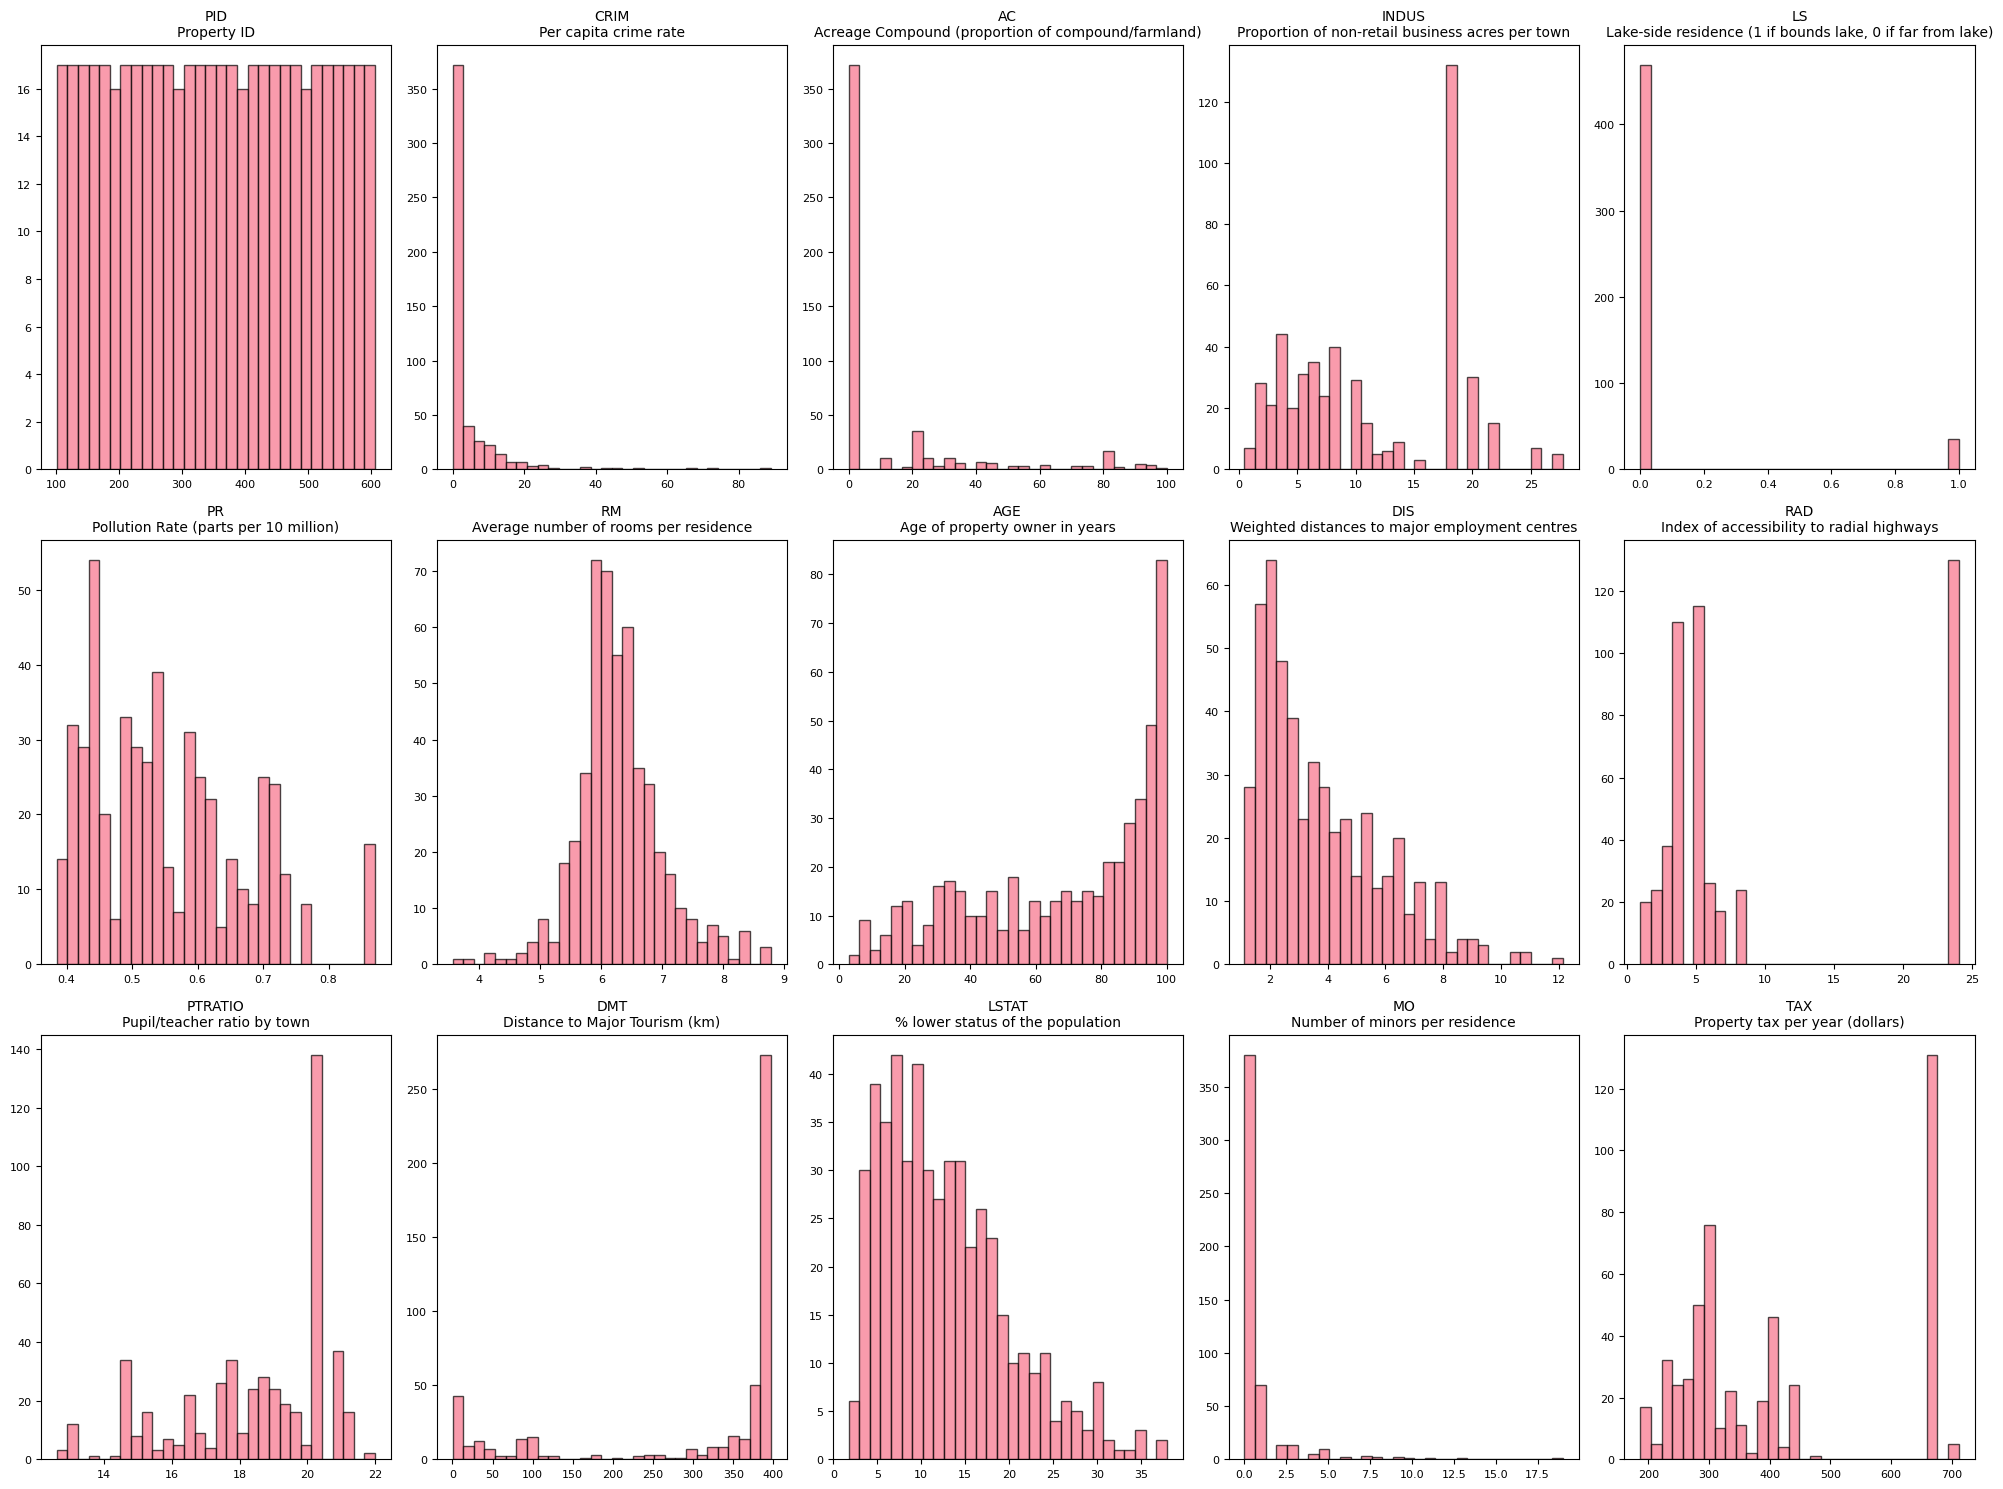

In [16]:

fig, axes = plt.subplots(3, 5, figsize=(20, 15))
axes = axes.ravel()

numerical_cols = House_data.select_dtypes(include=[np.number]).columns

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        axes[i].hist(House_data[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'{col}\n{column_names.get(col, "")}', fontsize=10)
        axes[i].tick_params(axis='both', labelsize=8)

plt.tight_layout()
plt.show()

# Correlation Analysis

Correlation Analysis:


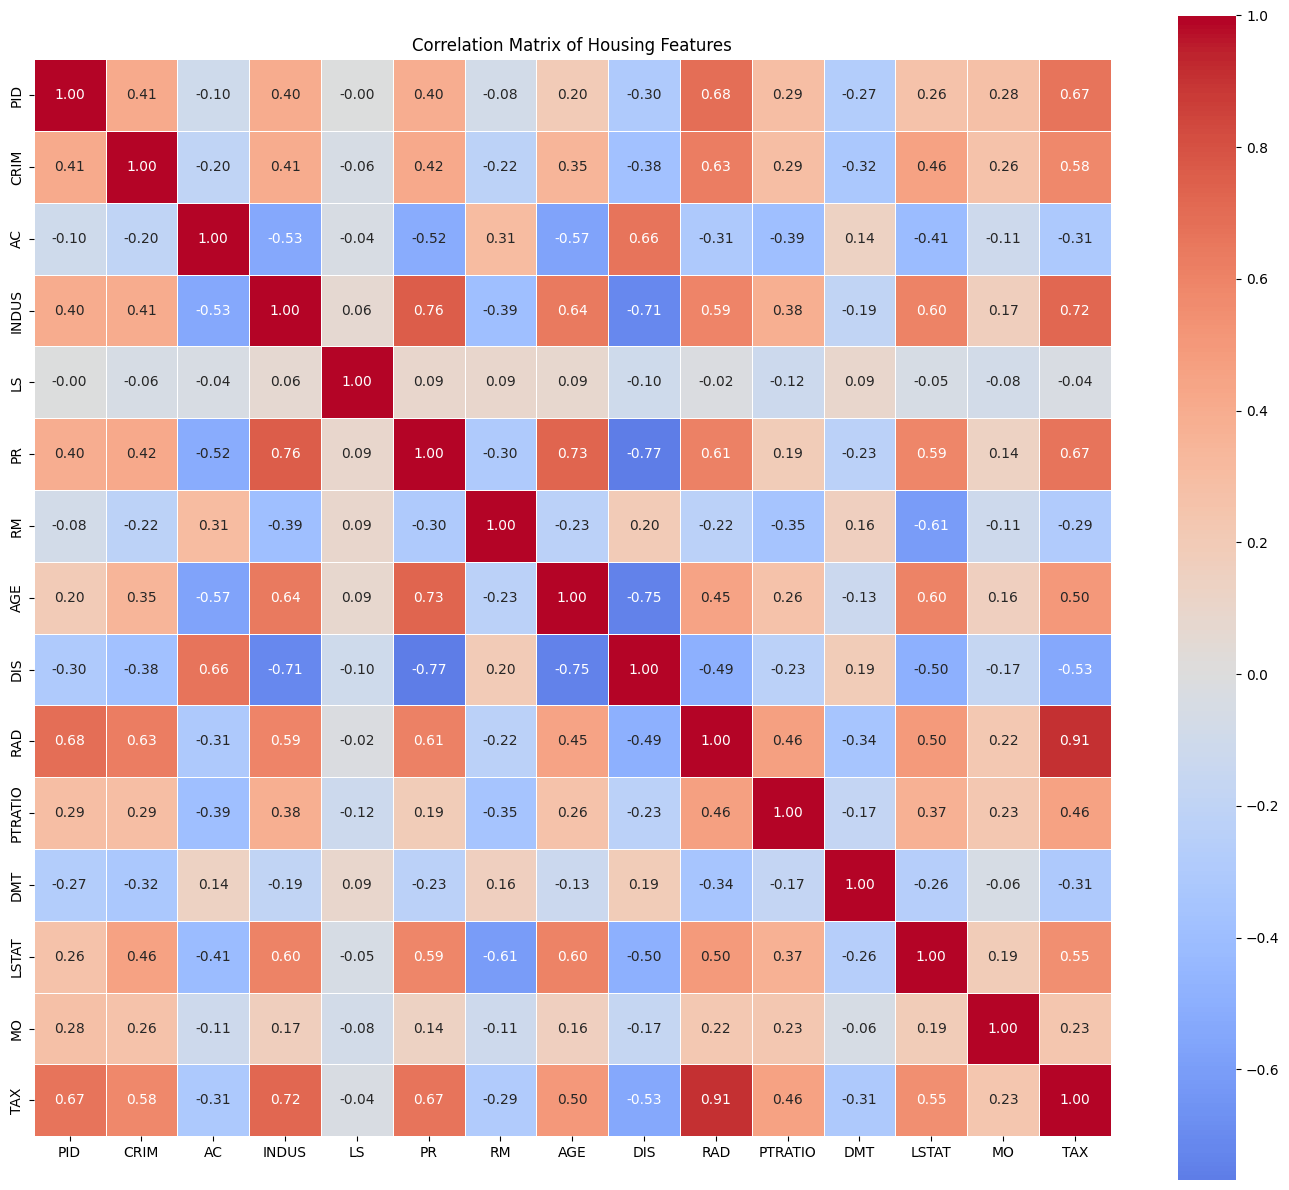


Highly Correlated Feature Pairs (|r| > 0.7):
INDUS - PR: 0.764
INDUS - DIS: -0.707
INDUS - TAX: 0.720
PR - AGE: 0.730
PR - DIS: -0.768
AGE - DIS: -0.747
RAD - TAX: 0.909


In [17]:

print("Correlation Analysis:")
print("="*20)



correlation_matrix = House_data.corr()

#Correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Housing Features')
plt.tight_layout()
plt.show()

#Correlated features
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append([
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ])

if high_corr_pairs:
    print("\nHighly Correlated Feature Pairs (|r| > 0.7):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

There is a strong Positive Correlation of (> 0.7) and Strong Negative Correlations (< -0.7)

Data preparation

In [18]:

print("Data Preprocessing:")
print("="*20)

# Create a copy for processing
House_data_processed = House_data.copy()

# I removed PID as it's just an identifier
House_data_processed = House_data_processed.drop('PID', axis=1)


print(f"Dataset shape after removing PID: {House_data_processed.shape}")


print("\nHandling missing values...")
missing_before = House_data_processed.isnull().sum().sum()
print(f"Missing values : {missing_before}")

# For numerical columns, I used median to do imputation
numerical_cols = House_data_processed.select_dtypes(include=[np.number]).columns
imputer_num = SimpleImputer(strategy='median')
House_data_processed[numerical_cols] = imputer_num.fit_transform(House_data_processed[numerical_cols])

missing_after = House_data_processed.isnull().sum().sum()
print(f"Missing values after handling them: {missing_after}")

Data Preprocessing:
Dataset shape after removing PID: (506, 14)

Handling missing values...
Missing values : 31
Missing values after handling them: 0


# Outlier Detection and Treatment

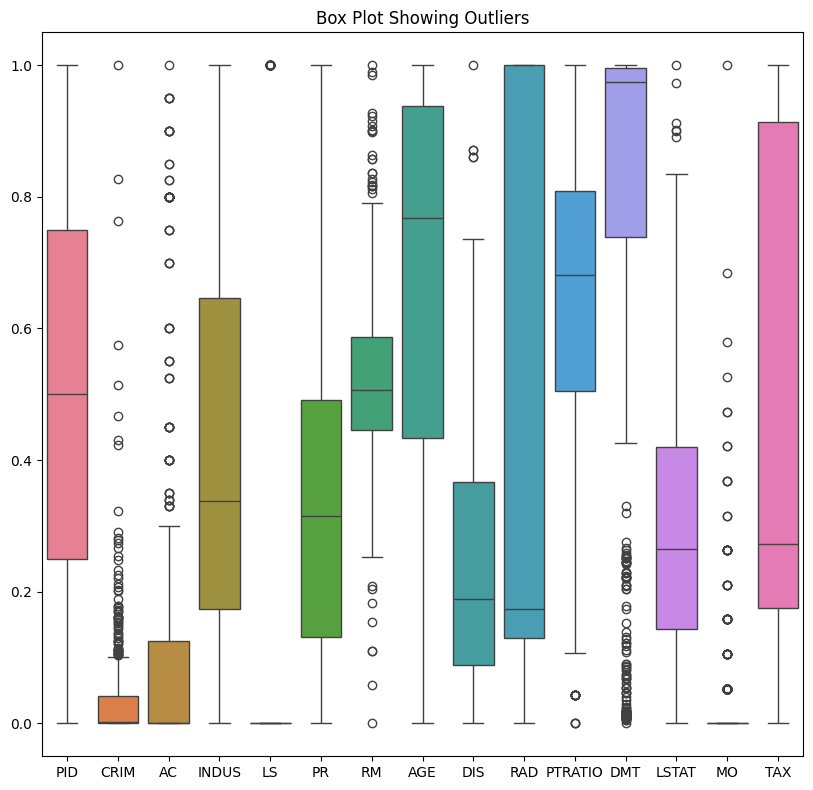

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
House_data_scaled = pd.DataFrame(scaler.fit_transform(House_data), columns=House_data.columns) # Scaling the data to a range of [0, 1] using MinMaxScaler

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
sns.boxplot(data=House_data_scaled)
plt.title("Box Plot Showing Outliers")
plt.tight_layout()
plt.show()

In [20]:
# Outlier Detection and Treatment
print("Outlier Detection and Treatment:")
print("="*35)

def detect_outliers_iqr(df, columns):
    outlier_indices = []
    outlier_info = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = House_data[(df[col] < lower_bound) | (House_data[col] > upper_bound)].index
        outlier_indices.extend(outliers)
        
        outlier_info[col] = {
            'count': len(outliers),
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            
        }
    
    return list(set(outlier_indices)), outlier_info

# Detecting outliers
outlier_indices, outlier_info = detect_outliers_iqr(House_data_processed, numerical_cols)

print(f"Total rows with outliers: {len(outlier_indices)}")
print("\nOutlier summary by column:")
for col, info in outlier_info.items():
    if info['count'] > 0:
        print(f"{col}: {info['count']}")

# Capping method
House_data_processed_capped = House_data_processed.copy()
for col in numerical_cols:
    Q1 = House_data_processed[col].quantile(0.25)
    Q3 = House_data_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    House_data_processed_capped[col] = np.clip(House_data_processed_capped[col], lower_bound, upper_bound)

print(f"\nUsing capped outliers approach")
print(f"Dataset shape: {House_data_processed_capped.shape}")
print(f"I used the capping approach because it preserves all 506 observations, maintains the correct ranking of outliers and reduces bias by retaining information about extreme cases.")

Outlier Detection and Treatment:
Total rows with outliers: 300

Outlier summary by column:
CRIM: 65
AC: 68
LS: 35
RM: 30
DIS: 5
PTRATIO: 15
DMT: 108
LSTAT: 7
MO: 124

Using capped outliers approach
Dataset shape: (506, 14)
I used the capping approach because it preserves all 506 observations, maintains the correct ranking of outliers and reduces bias by retaining information about extreme cases.


# Feature Engineering

In [21]:

print("Feature Engineering:")
print("="*18)

House_data_final = House_data_processed_capped.copy()

# Creating new features based on domain knowledge
House_data_final['ROOMS_PER_PERSON'] = House_data_final['RM'] / (House_data_final['MO'] + 1)  # +1 to avoid division by zero
House_data_final['CRIME_POLLUTION_INDEX'] = House_data_final['CRIM'] * House_data_final['PR']
House_data_final['ACCESSIBILITY_SCORE'] = House_data_final['RAD'] / House_data_final['DIS']  # Higher RAD, lower DIS = better accessibility
House_data_final['QUALITY_SCORE'] = House_data_final['RM'] / (House_data_final['AGE'] + 1)  # More rooms, less age = better quality

print("Created new features:")
print("- ROOMS_PER_PERSON: Average rooms divided by number of people")
print("- CRIME_POLLUTION_INDEX: Combined crime and pollution indicator")
print("- ACCESSIBILITY_SCORE: Ratio of highway access to employment distance")
print("- QUALITY_SCORE: Property quality based on rooms and age")

print(f"\nFinal dataset shape: {House_data_final.shape}")

Feature Engineering:
Created new features:
- ROOMS_PER_PERSON: Average rooms divided by number of people
- CRIME_POLLUTION_INDEX: Combined crime and pollution indicator
- ACCESSIBILITY_SCORE: Ratio of highway access to employment distance
- QUALITY_SCORE: Property quality based on rooms and age

Final dataset shape: (506, 18)


I chose TAX as the Target Variablebecause:

>Property tax correlates with property value

>It's a continuous variable suitable for regression

>It is more practical than creating composite indices

In [23]:

print("Target Variable Definition:")
print("="*28)

# Use TAX as our target variable (assuming higher tax = higher property value)
target_column = 'TAX'
feature_columns = [col for col in House_data_final.columns if col != target_column]

print(f"Target Variable: {target_column} (Property tax - proxy for property value)")
print(f"Number of features: {len(feature_columns)}")
print(f"Features: {feature_columns}")

# Separate features and target
X = House_data_final[feature_columns]
y = House_data_final[target_column]

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Target Variable Definition:
Target Variable: TAX (Property tax - proxy for property value)
Number of features: 17
Features: ['CRIM', 'AC', 'INDUS', 'LS', 'PR', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'DMT', 'LSTAT', 'MO', 'ROOMS_PER_PERSON', 'CRIME_POLLUTION_INDEX', 'ACCESSIBILITY_SCORE', 'QUALITY_SCORE']

Feature matrix shape: (506, 17)
Target vector shape: (506,)


In [24]:

print("Feature Scaling:")
print("="*15)

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

print("Features scaled using StandardScaler")
print(f"Scaled feature matrix shape: {X_scaled.shape}")


print("\nScaling Statistics:")
print(f"Mean of scaled features: {X_scaled.mean().mean():.6f}")
print(f"Std of scaled features: {X_scaled.std().mean():.6f}")

Feature Scaling:
Features scaled using StandardScaler
Scaled feature matrix shape: (506, 17)

Scaling Statistics:
Mean of scaled features: 0.000000
Std of scaled features: 0.883226


Modeling

In [27]:
# Split the data
print("Data Splitting:")
print("="*14)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=None
)

print(f"Training set - Features: {X_train.shape}, Target: {y_train.shape}")
print(f"Test set - Features: {X_test.shape}, Target: {y_test.shape}")
print(f"Training set size: {len(X_train)} ({len(X_train)/len(X_scaled)*100:.1f}%)")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(X_scaled)*100:.1f}%)")

Data Splitting:
Training set - Features: (404, 17), Target: (404,)
Test set - Features: (102, 17), Target: (102,)
Training set size: 404 (79.8%)
Test set size: 102 (20.2%)


In [28]:

print("Model Training and Comparison:")
print("="*30)
print("""I used three models to get a reliable analysis of the dataset. First, Linear Regression provided a simple, 
easy-to-understand baseline. Then, Random Forest captured non-linear relationships and complex feature interactions that 
Linear Regression might miss. Finally, I tuned the Random Forest’s hyperparameters to improve accuracy. Comparing these models 
helped ensure robust insights. I also used an 80-20 train-test split with a fixed random state to keep results reproducible and avoid overfitting.""")


# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Random Forest (Tuned)': RandomForestRegressor(
        n_estimators=200, 
        max_depth=10, 
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )
}


# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\nTraining {name}")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    results[name] = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'test_mae': test_mae,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'model': model,
        'predictions': y_pred_test
    }
    
    print(f"  Training R²: {train_r2:.4f}")
    print(f"  Test R²: {test_r2:.4f}")
    print(f"  Cross-validation R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

Model Training and Comparison:
I used three models to get a reliable analysis of the dataset. First, Linear Regression provided a simple, 
easy-to-understand baseline. Then, Random Forest captured non-linear relationships and complex feature interactions that 
Linear Regression might miss. Finally, I tuned the Random Forest’s hyperparameters to improve accuracy. Comparing these models 
helped ensure robust insights. I also used an 80-20 train-test split with a fixed random state to keep results reproducible and avoid overfitting.

Training Linear Regression
  Training R²: 0.8736
  Test R²: 0.8876
  Cross-validation R²: 0.8658 (±0.0368)

Training Random Forest
  Training R²: 0.9951
  Test R²: 0.9723
  Cross-validation R²: 0.9591 (±0.0200)

Training Random Forest (Tuned)
  Training R²: 0.9907
  Test R²: 0.9710
  Cross-validation R²: 0.9503 (±0.0241)


In [29]:

print("Model Selection:")
print("="*15)

# Compare models
comparison_df = pd.DataFrame({
    'Model': results.keys(),
    'Test R²': [results[model]['test_r2'] for model in results.keys()],
    'Test RMSE': [np.sqrt(results[model]['test_mse']) for model in results.keys()],
    'Test MAE': [results[model]['test_mae'] for model in results.keys()],
    'CV R² Mean': [results[model]['cv_mean'] for model in results.keys()],
    'CV R² Std': [results[model]['cv_std'] for model in results.keys()]
})

print(comparison_df.round(4))

# Select best model based on test R²
best_model_name = comparison_df.loc[comparison_df['Test R²'].idxmax(), 'Model']
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

print(f"\nBest Model: {best_model_name}")
print(f"Best Test R²: {results[best_model_name]['test_r2']:.4f}")

Model Selection:
                   Model  Test R²  Test RMSE  Test MAE  CV R² Mean  CV R² Std
0      Linear Regression   0.8876    59.2090   36.7103      0.8658     0.0368
1          Random Forest   0.9723    29.3755   14.0946      0.9591     0.0200
2  Random Forest (Tuned)   0.9710    30.0656   15.0237      0.9503     0.0241

Best Model: Random Forest
Best Test R²: 0.9723


Evaluation

In [30]:
#Detailed Model Evaluation
print("Detailed Model Evaluation:")
print("="*27)

best_result = results[best_model_name]

print(f"Model: {best_model_name}")
print("-" * 40)
print(f"Training MSE: {best_result['train_mse']:.2f}")
print(f"Test MSE: {best_result['test_mse']:.2f}")
print(f"Training R²: {best_result['train_r2']:.4f}")
print(f"Test R²: {best_result['test_r2']:.4f}")
print(f"Test RMSE: {np.sqrt(best_result['test_mse']):.2f}")
print(f"Test MAE: {best_result['test_mae']:.2f}")
print(f"Cross-validation R²: {best_result['cv_mean']:.4f} (±{best_result['cv_std']:.4f})")

# Check for overfitting
overfitting = best_result['train_r2'] - best_result['test_r2']
if overfitting > 0.1:
    print(f"\n Potential overfitting detected (difference: {overfitting:.4f})")
else:
    print(f"\n Good generalization (difference: {overfitting:.4f})")

Detailed Model Evaluation:
Model: Random Forest
----------------------------------------
Training MSE: 134.30
Test MSE: 862.92
Training R²: 0.9951
Test R²: 0.9723
Test RMSE: 29.38
Test MAE: 14.09
Cross-validation R²: 0.9591 (±0.0200)

 Good generalization (difference: 0.0228)


Feature Importance Analysis:
Top 10 Most Important Features:
                  feature  importance  \
15    ACCESSIBILITY_SCORE    0.386825   
8                     RAD    0.313209   
0                    CRIM    0.165020   
2                   INDUS    0.078617   
4                      PR    0.020588   
7                     DIS    0.010836   
9                 PTRATIO    0.007075   
14  CRIME_POLLUTION_INDEX    0.004404   
1                      AC    0.002938   
16          QUALITY_SCORE    0.002890   

                                  feature_description  
15                                ACCESSIBILITY_SCORE  
8           Index of accessibility to radial highways  
0                               Per capita crime rate  
2    Proportion of non-retail business acres per town  
4               Pollution Rate (parts per 10 million)  
7      Weighted distances to major employment centres  
9                         Pupil/teacher ratio by town  
14                              CRIME_P

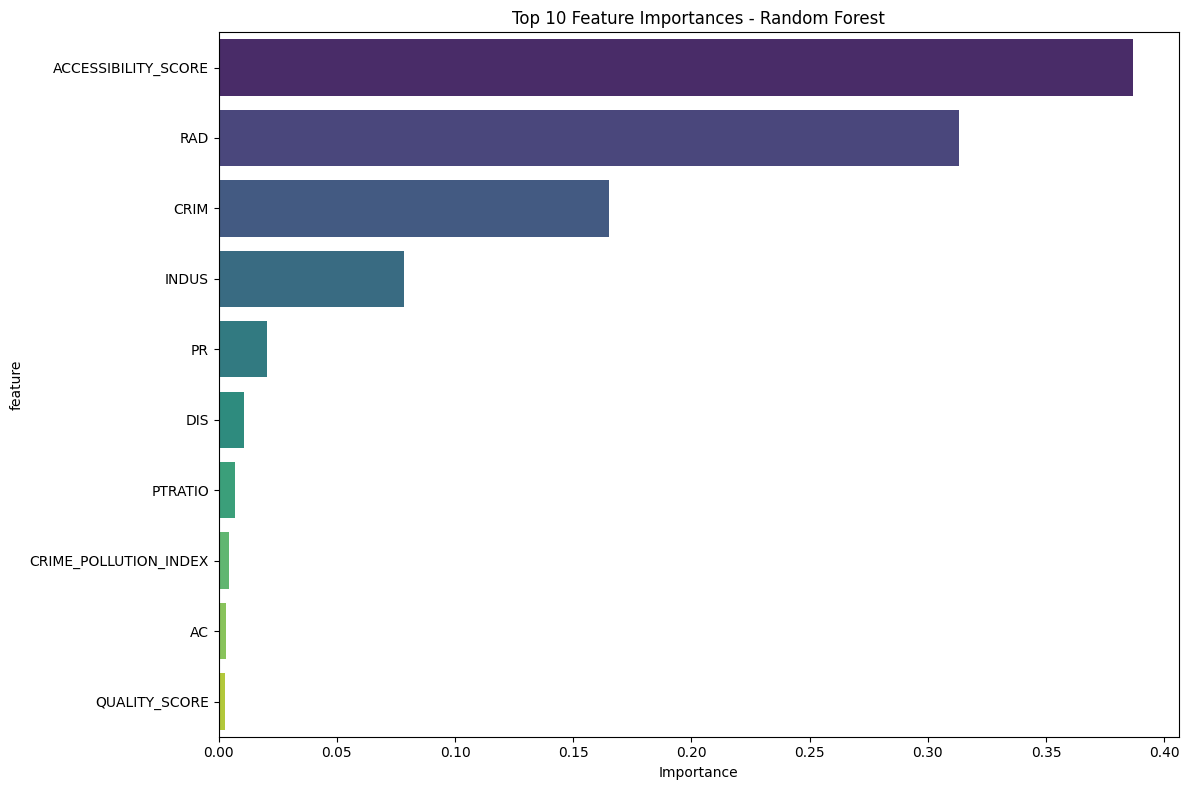

In [31]:
# Cell 18: Feature Importance Analysis
print("Feature Importance Analysis:")
print("="*29)

if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_,
        'feature_description': [column_names.get(col.split('_')[0], col) for col in X.columns]
    }).sort_values('importance', ascending=False)
    
    print("Top 10 Most Important Features:")
    print(feature_importance.head(10)[['feature', 'importance', 'feature_description']])
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(10)
    sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')
    plt.title(f'Top 10 Feature Importances - {best_model_name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    
else:
    print("Selected model doesn't provide feature importance scores")
    
    # For Linear Regression, show coefficients
    if hasattr(best_model, 'coef_'):
        coefficients = pd.DataFrame({
            'feature': X.columns,
            'coefficient': best_model.coef_,
            'abs_coefficient': np.abs(best_model.coef_)
        }).sort_values('abs_coefficient', ascending=False)
        
        print("\nTop 10 Features by Coefficient Magnitude:")
        print(coefficients.head(10))

Model Performance Visualization:


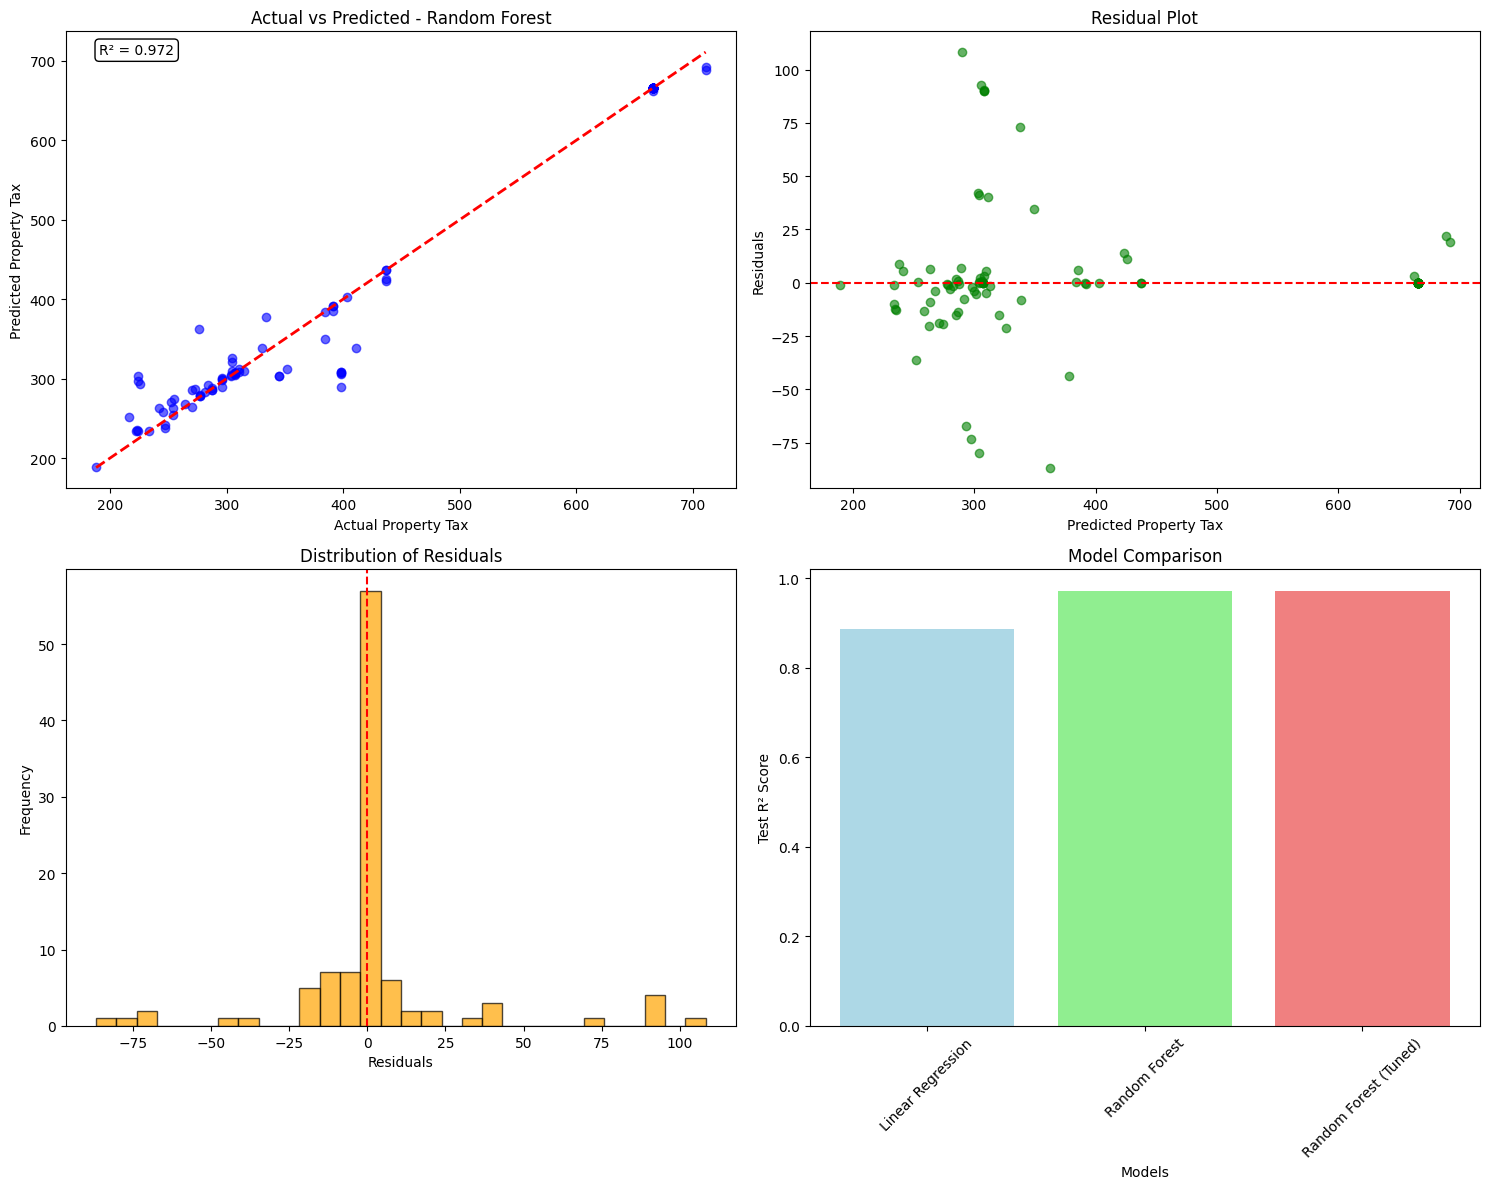

In [ ]:
# Visualization of Results
print("Model Performance Visualization:")
print("="*31)

# Create comprehensive plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test, best_predictions, alpha=0.6, color='blue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Property Tax')
axes[0, 0].set_ylabel('Predicted Property Tax')
axes[0, 0].set_title(f'Actual vs Predicted - {best_model_name}')
axes[0, 0].text(0.05, 0.95, f'R² = {best_result["test_r2"]:.3f}', 
                transform=axes[0, 0].transAxes, bbox=dict(boxstyle="round", facecolor='white'))

# 2. Residual plot
residuals = y_test - best_predictions
axes[0, 1].scatter(best_predictions, residuals, alpha=0.6, color='green')
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Predicted Property Tax')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')

# 3. Distribution of residuals
axes[1, 0].hist(residuals, bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Residuals')
axes[1, 0].axvline(x=0, color='r', linestyle='--')

# 4. Model comparison
model_names = list(results.keys())
r2_scores = [results[name]['test_r2'] for name in model_names]
axes[1, 1].bar(range(len(model_names)), r2_scores, color=['lightblue', 'lightgreen', 'lightcoral'])
axes[1, 1].set_xlabel('Models')
axes[1, 1].set_ylabel('Test R² Score')
axes[1, 1].set_title('Model Comparison')
axes[1, 1].set_xticks(range(len(model_names)))
axes[1, 1].set_xticklabels(model_names, rotation=45)

plt.tight_layout()
plt.show()

In [34]:

print("Residual Analysis:")
print("="*17)

residuals = y_test - best_predictions

# Statistical tests on residuals
from scipy.stats import shapiro, jarque_bera

# Test for normality
shapiro_stat, shapiro_p = shapiro(residuals)
jb_stat, jb_p = jarque_bera(residuals)

print(f"Residual Statistics:")
print(f"Mean: {residuals.mean():.6f}")
print(f"Standard Deviation: {residuals.std():.4f}")
print(f"Skewness: {stats.skew(residuals):.4f}")
print(f"Kurtosis: {stats.kurtosis(residuals):.4f}")

print(f"\nNormality Tests:")
print(f"Shapiro-Wilk test p-value: {shapiro_p:.6f}")
print(f"Jarque-Bera test p-value: {jb_p:.6f}")


print(" Residuals may not be normally distributed (Shapiro-Wilk)")

Residual Analysis:
Residual Statistics:
Mean: 2.030490
Standard Deviation: 29.4499
Skewness: 0.9197
Kurtosis: 4.7158

Normality Tests:
Shapiro-Wilk test p-value: 0.000000
Jarque-Bera test p-value: 0.000000
 Residuals may not be normally distributed (Shapiro-Wilk)
